Import Libraries

In [39]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from metric_learn import LMNN, LFDA
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sb
import matplotlib.pyplot as plt

Functions

In [2]:
def Data():
  data = load_wine()
  x_train, x_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.2, random_state=42)
  return x_train, x_test, y_train, y_test, data

In [3]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum(np.power(x1 - x2, 2)))

In [4]:
def KNN(x, x_train, y_train, k):
  distances = [euclidean_distance(x, x_train) for x_train in x_train]
  k_idx = np.argsort(distances)[:k]
  k_neighbor_labels = [y_train[i] for i in k_idx]
  most_common = Counter(k_neighbor_labels).most_common(1)
  return most_common[0][0]

In [5]:
def predict(X, x_train, y_train, k):
  y_pred = [KNN(x, x_train, y_train, k) for x in X]
  return np.array(y_pred)

In [6]:
def PCA_(data):
  pca2 = PCA(n_components=2)
  pca2.fit(data)
  return pca2.transform(data)

In [7]:
def Plot(x, y, i, flag):
  plt.figure(figsize=(5,8))
  plt.scatter(x[:,0], x[:,1], c=y)
  if flag:
    plt.title('Original')
  else:
    plt.title(f'Transformed {i} NN')
  plt.xlabel('first-dim')
  plt.ylabel('second-dim')
  plt.show()

In [23]:
def LFDA_(x, y, k):
  lfda = LFDA(k=k)
  lfda.fit(x, y)
  return lfda.transform(x)

In [9]:
def LMNN_(x, y, k):
  lmnn = LMNN(k=k)
  lmnn.fit(x, y)
  return lmnn.transform(x)

KNN

In [33]:
x_train, x_test, y_train, y_test, data = Data()

In [11]:
K = [10, 15, 20]
for i in K:
  y_pred = predict(x_test, x_train, y_train, i)
  print(f'K = {i}')
  print(f'Accuracy: {accuracy_score(y_test, y_pred)*100}')
  print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n')

K = 10
Accuracy: 69.44444444444444
Confusion Matrix:
 [[12  0  2]
 [ 0  9  5]
 [ 2  2  4]]

K = 15
Accuracy: 75.0
Confusion Matrix:
 [[14  0  0]
 [ 0  9  5]
 [ 2  2  4]]

K = 20
Accuracy: 77.77777777777779
Confusion Matrix:
 [[14  0  0]
 [ 0  9  5]
 [ 1  2  5]]



PCA & LFDA & LMNN

In [34]:
data_new = PCA_(data['data'])

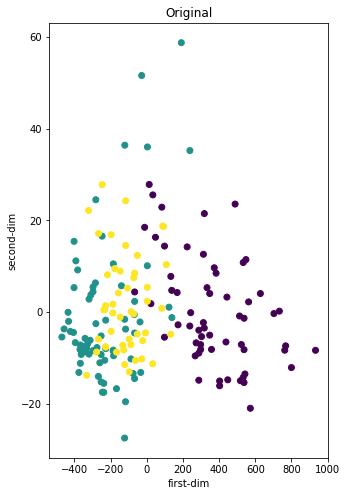

/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


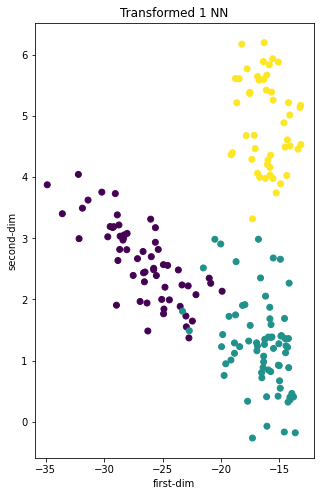

/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


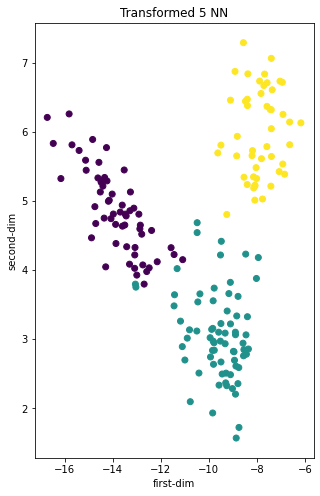

/usr/local/lib/python3.8/dist-packages/metric_learn/lfda.py:109: UserWarning: Chosen k (15) too large, using 12 instead.
  warnings.warn('Chosen k (%d) too large, using %d instead.'
/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


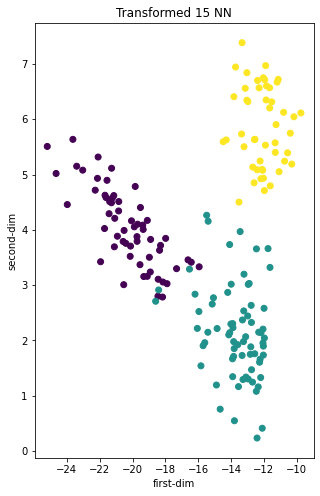

In [24]:
K = [1, 5, 15]
Plot(data_new, data['target'], 0, 1)
for i in K:
  x = LFDA_(data['data'], data['target'], i)
  Plot(x, data['target'], i, 0)

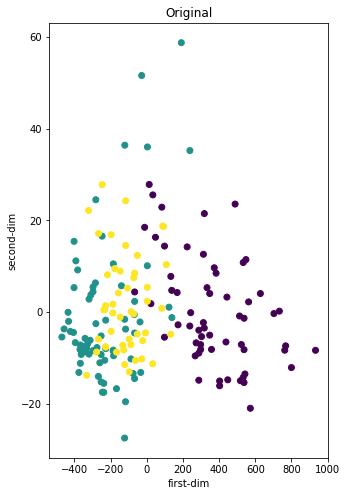

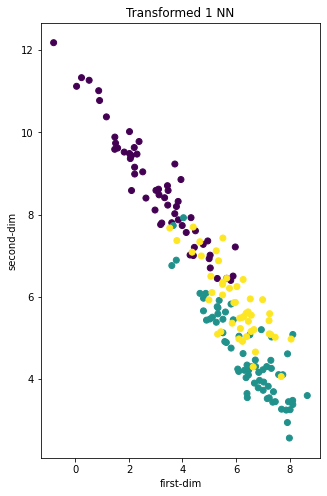

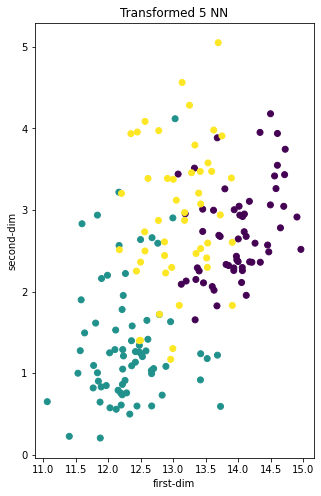

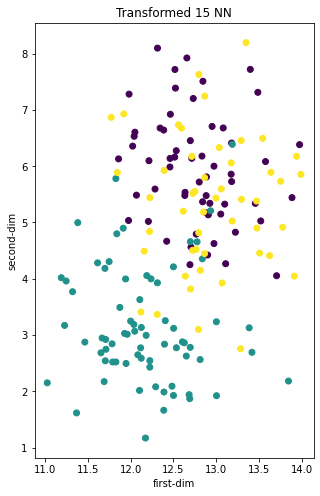

In [26]:
K = [1, 5, 15]
Plot(data_new, data['target'], 0, 1)
for i in K:
  x = LMNN_(data['data'], data['target'], i)
  Plot(x, data['target'], i, 0)

In [37]:
wine=pd.DataFrame(data=np.c_[data['data']],columns=data['feature_names'])

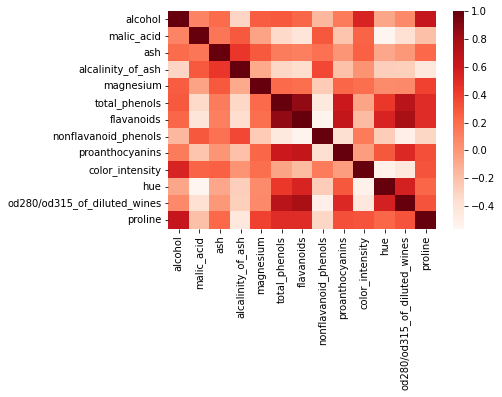

In [55]:
dataplot = sb.heatmap(wine.corr(), cmap="Reds")
plt.show()